<a href="https://colab.research.google.com/github/MileneCV/Stroke_Prediction_project_2/blob/main/stroke_prediction_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**name:** Milene Carmes Vallejo

**last updated:** 11/4/2022

# Stroke Prediction Dataset 




## Project Description 

This dataset will be used to predict whether a patient is likely to get stroke based in these informations:  



## Data Dictionary
1) **id:** unique identifier

2) **gender:** "Male", "Female" or "Other"

3) **age:** age of the patient

4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) **ever_married:** "No" or "Yes"

7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) **Residence_type:** "Rural" or "Urban"

9)** avg_glucose_level:** average glucose level in blood

10) **bmi:** body mass index

11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) **stroke:**1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Import libraries

In [279]:
import pandas as pd 
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Load data

In [280]:
drive.mount('/content/drive')
filename = '/content/drive/My Drive/stroke_prediction_dataset.csv'
df = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
# make a copy
df_copy = df.copy()

In [282]:
df_copy.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [283]:
# copy df
df_copy.shape

(5110, 12)

## Prepare/clean the data

### Dropping unnecessary columns.

- We will drop the `id` column since this column is a unique identifier. 
- We will then check `df_copy.info()` again to make sure that the column is dropped.

In [284]:
df_copy = df_copy.drop(columns='id')
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Duplicated Data
Checking for duplicated data:

In [285]:
df_copy.duplicated().sum()

0

There is no duplicates in the dataset

### Missing Values
Checking for missing values:


In [286]:
df_copy.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Identifying % of missing data

In [287]:
df_copy.isna().sum()/len(df_copy)*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

There are 201 missing values in bmi column (3.93%). We will fill in the missing values with the mean of bmi. 

In [288]:
# find mean of bmi
mean_bmi = df_copy['bmi'].mean()
mean_bmi

28.893236911794666

In [289]:
# replace Nan in bmi column by mean_bmi
df_copy['bmi'].fillna(mean_bmi, inplace=True)

- Checking to make sure the values for the `bmi` column were filled in.

In [290]:
df_copy.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Fixing Data Types

- We will now address the data types and make sure that they match the data dictionary.

In [291]:
df_copy.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

###Fixing any inconsistent values in columns

#### Categorical columns

In [292]:
# find categorical columns
df_types = df_copy.dtypes
string_cols = df_types[df_copy.dtypes=='object'].index
string_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

##### **gender column**

In [293]:
df_copy['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

##### **ever_married column**

In [294]:
df_copy['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

##### **work_type column**

In [295]:
df_copy['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

##### **Residence_type column**

In [296]:
df_copy['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

##### **smoking_status column**

In [297]:
df_copy['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

#### Float columns

In [298]:
# find float columns
float_cols = df_types[df_copy.dtypes=='float'].index
float_cols

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

##### **Age column**

In [299]:
df_copy['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

##### **Avg_glucose_level column**

In [300]:
df_copy['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

##### **bmi**

In [301]:
df_copy['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

#### Integer column

In [302]:
# find integer columns
integer_cols = df_types[df_copy.dtypes=='int64'].index
integer_cols

Index(['hypertension', 'heart_disease', 'stroke'], dtype='object')

##### **hypertension column**

In [303]:
df_copy['hypertension'].unique()

array([0, 1])

##### **heart_disease column**

In [304]:
df_copy['heart_disease'].unique()

array([1, 0])

##### **stroke column**

In [305]:
df_copy['stroke'].unique()

array([1, 0])

### Summary statistics for numeric columns

In [306]:
df_copy.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Exploratory Visual and Analysis

#### Number of patients who had stroke

Number of patient had stroke (1) or not (0)
0    0.951272
1    0.048728
Name: stroke, dtype: float64






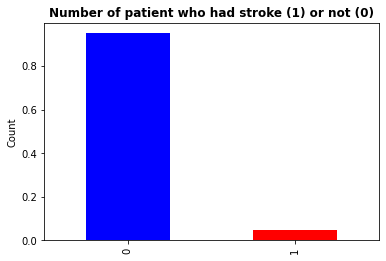

In [307]:
#Count of patients
stroke_values = df_copy['stroke'].value_counts(normalize=True)
print('Number of patient had stroke (1) or not (0)')
print(stroke_values)
print('\n')
print('\n')
stroke_values.plot(kind = 'bar', color = ['blue','red'])
plt.title('Number of patient who had stroke (1) or not (0)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count')
#plt.xlabel('0'='no stroke', '1'='stroke')
plt.show()


The dataset is unbalaced: 95% od patients did't have stroke and less than 5% of patients had a stroke



#### Comparation of all features in patients who had a stroke and didn't have. 

##### Split the dataset in patients who had stroke or not

In [308]:
# had stroke 
df_stroke = df_copy.loc[df_copy['stroke']==1]
# no stroke
df_no_stroke = df_copy.loc[df_copy['stroke']==0]


##### Create a function to plot a histogram and boxplot for the selected column

In [309]:
def plot_numeric(df1,df2,col):
  # function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=4, figsize=(10,10), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df1,x = col,ax = axes[0])
  mean_value = df1[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[0].legend()

  med_value = df1[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");
  axes[0].legend()


  sns.boxplot(data=df1, x = col, ax = axes[1])

  ## Updating title of top graph to df1  
  axes[0].set_title(f' Distribution of {col} in patients who had stoke', fontsize = 15, fontweight = 'bold')


  sns.histplot(data=df2,x = col,ax = axes[2])
  mean_value = df2[col].mean()
  axes[2].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);
  axes[2].legend()

  med_value = df2[col].median()
  axes[2].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");
  axes[2].legend()


  sns.boxplot(data=df2, x = col, ax = axes[3])

  ## Updating title of top graph to df 2 
  axes[2].set_title(f'Distribution of {col} in patients who did not have stroke', fontsize = 15, fontweight = 'bold' )

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

###### **Age distribution** 

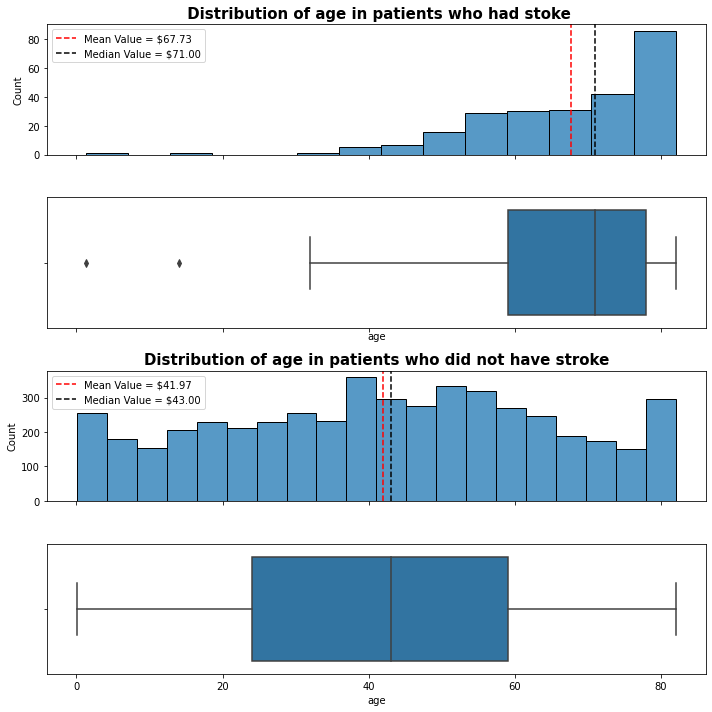

In [310]:
plot_numeric(df_stroke, df_no_stroke, 'age')

Most of patients who had stroke are older than 40 years old. We can see only 2 outliers in boxplot and the median age is 71 years old. In patients who didn't have stroke the age goes to 0 to 80 years old and the median is 43 years old.  

###### **Average of glucose level distribution** 

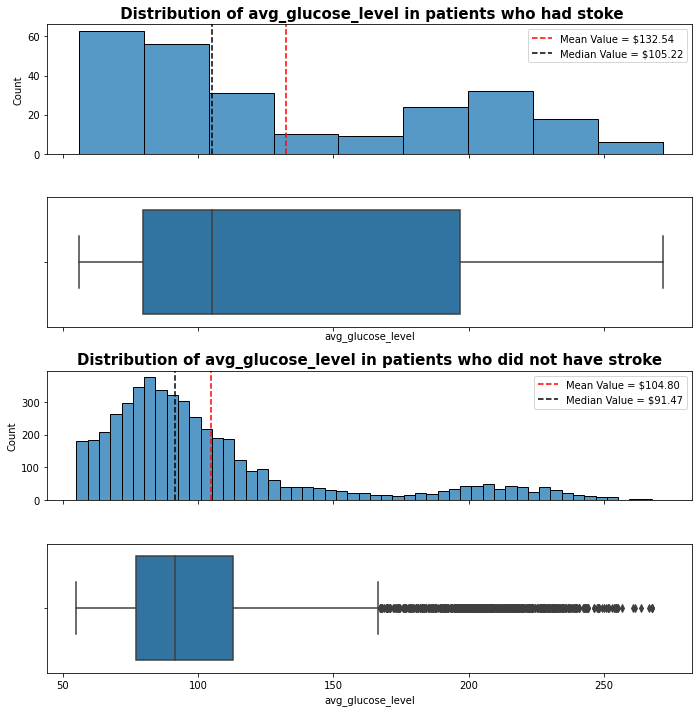

In [311]:
plot_numeric(df_stroke, df_no_stroke, 'avg_glucose_level')

In patients who didn't have stroke there are more outliers in average of glucose level. The mean in patients who had stroke is higher (132.54) than in patients who didn't have (104,80). Most of patients in both group have average of glucose between 60 and 120.  

###### **Bmi distribution**

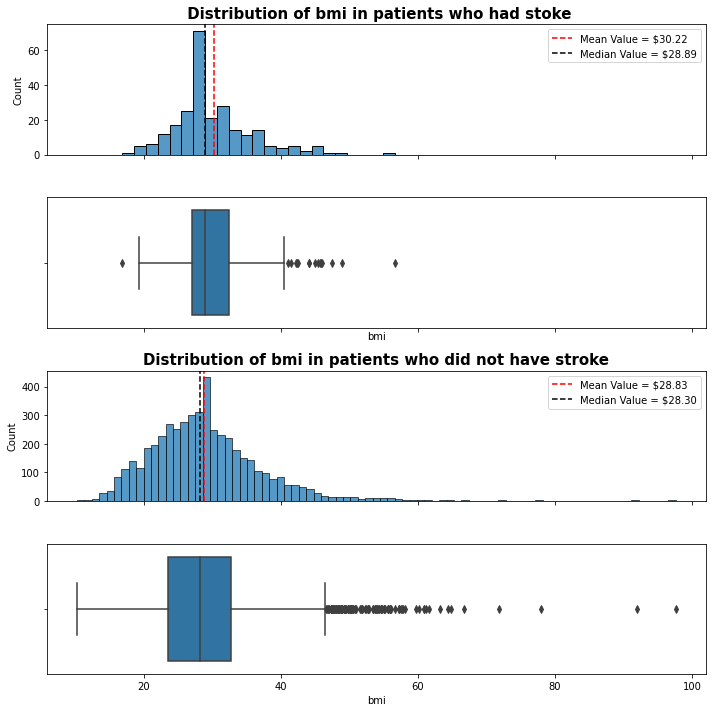

In [312]:
plot_numeric(df_stroke, df_no_stroke, 'bmi')

In patients who didn't have stroke there are more outliers in bmi. The max in patients who had stroke is about 60 and in patients who didn't have the max is about 100. 

##### Create a function to plot a barplot

In [313]:
def plot_bar(df1,df2,x):
    ## Make a larger fig/ax before plotting
    fig, axes = plt.subplots(ncols=2, figsize=(12,5))
    ## counts, counts up the categories, sort the values, then puts them in a data frame.
    # count df1 = stroke
    counts_stroke = df1[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
    ## ploting the barplot of df_stroke
    sns.barplot(data=counts_stroke,x=counts_stroke.index, y = counts_stroke[x], ax = axes[0])
    axes[0].set_title('had stroke', fontsize = 15, fontweight = 'bold')
    
    # count df2= no_stroke 
    counts_no_stroke = df2[x].value_counts(normalize=True).sort_values(ascending=False).to_frame()
    ## ploting the barplot of df_no_stroke
    sns.barplot(data=counts_no_stroke,x=counts_no_stroke.index, y = counts_no_stroke[x], ax = axes[1])
    axes[1].set_title('no stroke', fontsize = 15, fontweight = 'bold' )
    

    
    fig.suptitle(f'{x} in patients who:', fontsize = 20, fontweight = 'bold', y = 1.05)
    plt.tight_layout()


###### **Ever married distribution**

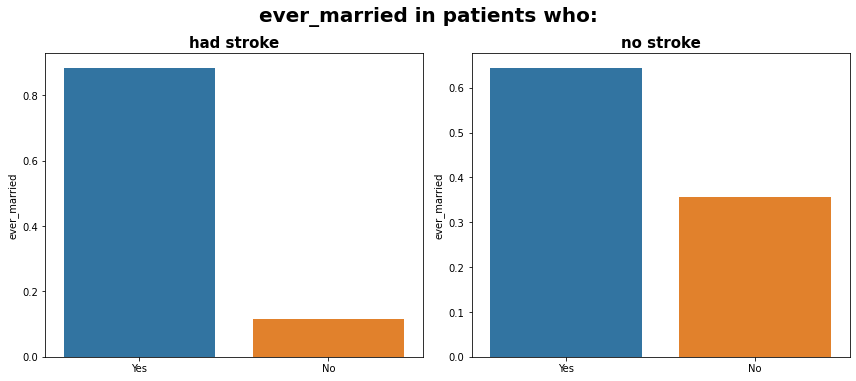

In [314]:
plot_bar(df_stroke, df_no_stroke, 'ever_married')

In patients who didn't have stroke the number of no married is bigger (about 30%) than in patients who had stroke (less than 10%)

###### **Gender distribution**

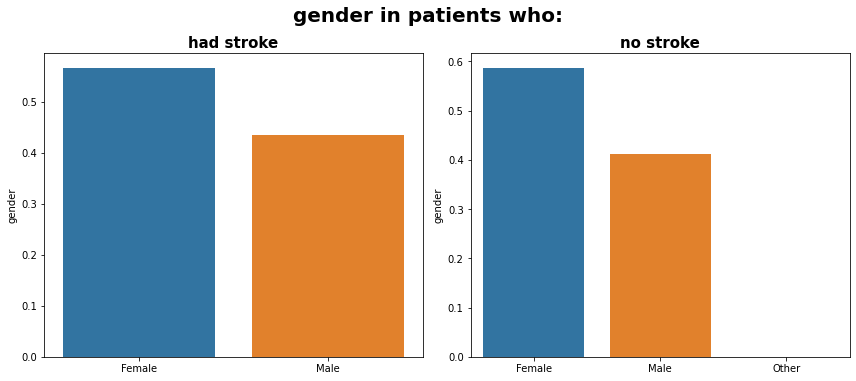

In [315]:
plot_bar(df_stroke, df_no_stroke, 'gender')

In both group more the 50% of patients are female. 

###### **Work_type distributio**n

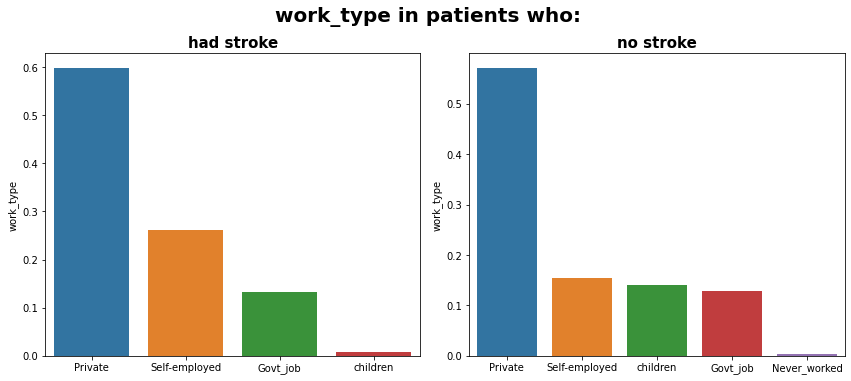

In [316]:
plot_bar(df_stroke, df_no_stroke, 'work_type')

In patients who did not have stroke there are more children. 

###### **Residence type distribution**

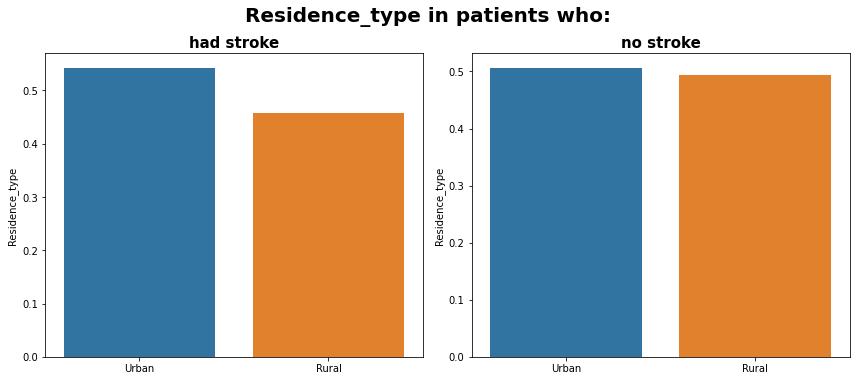

In [317]:
plot_bar(df_stroke, df_no_stroke, 'Residence_type')

Patients who had stroke about 55% live in urban area and 45% in rural area. In patients who did not have stroke is very similar the type of residence. 


###### **Smoking_status distribution**

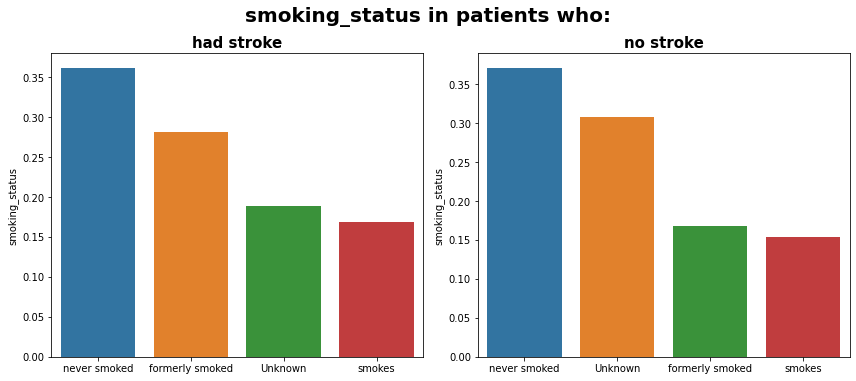

In [318]:
plot_bar(df_stroke, df_no_stroke, 'smoking_status')

The number of patients who had stroke that formerly smoked is bigger (more than 25%) than in patients who did not have stroke (about 15%)

###### **Hypertension distribution**

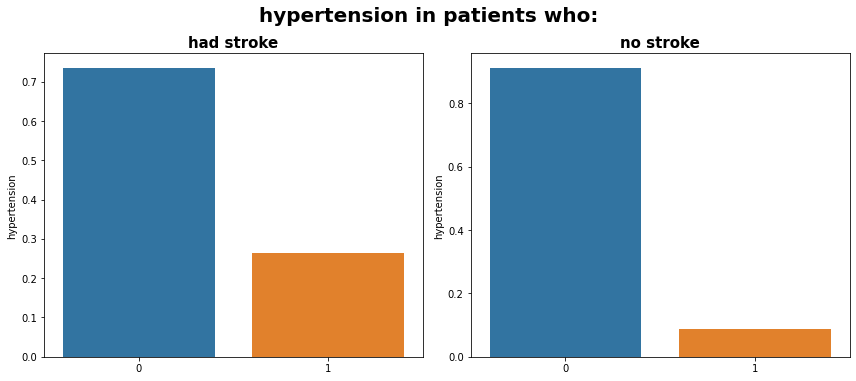

In [319]:
plot_bar(df_stroke, df_no_stroke, 'hypertension')

In patients who had stroke the number of hypertension is bigger (about 25%) than in patients who didn't have stroke (less than 10%)

###### **Heart disease distribution**  

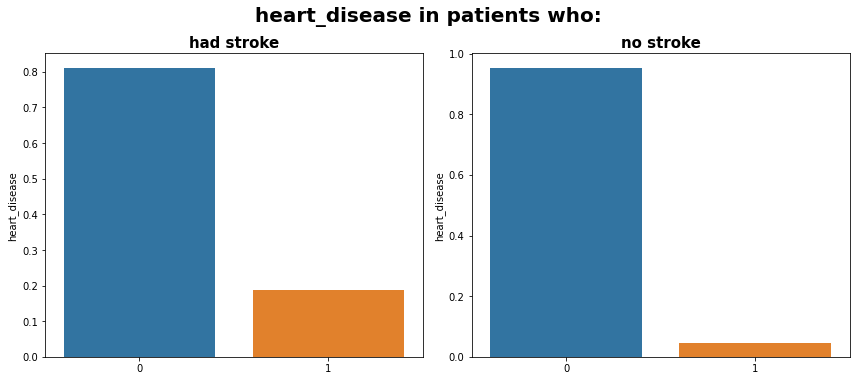

In [320]:
plot_bar(df_stroke, df_no_stroke, 'heart_disease')

In patients who had stroke about 20% have heart disease and in patients who didn't have stroke less than 5% have heart disease.